In [1]:
using Graphs, SimpleWeightedGraphs
using GraphPlot
using Random
using DataStructures

In [2]:
function generate_distance_matrix(n, rng)
    adjacency_matrix = zeros(n, n)
    X = 10 * rand(rng, n) # x 좌표
    Y = 10 * rand(rng, n) # y 좌표
    for i in 1:n
        for j in 1:n
            if i == j
                continue
            end
            d = sqrt((X[i] - X[j])^2 + (Y[i] - Y[j])^2) #distance
            if rand() > 0.5
                adjacency_matrix[i, j] = round(d) * (-1)
            else
                adjacency_matrix[i, j] = round(d)
            end
        end
    end
    #d = [sqrt((X[i] - X[j])^2 + (Y[i] - Y[j])^2) for i in 1:n, j in 1:n] #distance
    #adjacency_matrix[i, j] = d
    return adjacency_matrix
end

generate_distance_matrix (generic function with 1 method)

In [3]:
function generate_graph(n, p=0.5, random_seed=1234)
    rng = Random.MersenneTwister(random_seed)
    adj = generate_distance_matrix(n, rng)
    g = SimpleWeightedDiGraph(n)
    for i in 1:n
        for j in i+1:n
            if rand() > p
                add_edge!(g, i, j, adj[i, j])
            end
        end
    end
    return g
end

generate_graph (generic function with 3 methods)

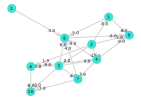

In [4]:
n = 10
g = generate_graph(n)
nodelabel = collect(1:nv(g))
edgelabel = [edge.weight for edge in edges(g)]
gplot(g, nodelabel=nodelabel, edgelabel=edgelabel)

In [5]:
has_negative_edge_cycle(g)

false

### Example

In [6]:
n_nodes= 7
g = SimpleWeightedDiGraph(n_nodes)

{7, 0} directed simple Int64 graph with Float64 weights

In [7]:
add_edge!(g, 1, 2, 6)
add_edge!(g, 1, 3, 2)
add_edge!(g, 2, 3, -5)
add_edge!(g, 2, 4, -1)
add_edge!(g, 2, 5, 4)
add_edge!(g, 3, 4, 3)
add_edge!(g, 3, 6, -6)
add_edge!(g, 4, 5, 4)
add_edge!(g, 3, 6, 4)
add_edge!(g, 5, 7, -7)
add_edge!(g, 6, 4, 1)
add_edge!(g, 6, 5, 7)
add_edge!(g, 6, 7, 7)

true

In [8]:
g

{7, 12} directed simple Int64 graph with Float64 weights

In [9]:
nodelabel = collect(1:nv(g))
edgelabel = [edge.weight for edge in edges(g)]

12-element Vector{Float64}:
  6.0
  2.0
 -5.0
 -1.0
  4.0
  3.0
  4.0
  4.0
 -7.0
  1.0
  7.0
  7.0

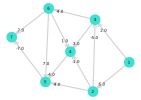

In [10]:
gplot(g, nodelabel=nodelabel, edgelabel=edgelabel)

In [11]:
has_negative_edge_cycle(g)

false

### Algorithm

In [34]:
function bellman_ford_QUEUE(g, n)
    # 거리 정의
    distance = fill(Inf, n)
    distance[1] = 0
    # 경로 정의
    path = fill(0, n)
    path[1] = 0
    # queue 정의
    queue = Queue{Int}()
    enqueue!(queue,1)
    # Count label update
    count = 0
    # Algorithm
    while !isempty(queue)
        p = dequeue!(queue)
        for edge in edges(g)
            i, j, cost = edge.src, edge.dst, edge.weight
            if p == i
                if distance[j] > distance[i] + cost
                    distance[j] = distance[i] + cost
                    path[j] = i
                    count += 1
                    if !(j in queue)
                        enqueue!(queue, j)
                    end
                end
            end
        end
    end
    println("The number of label updates is : ", count)
    return distance, path
end

bellman_ford_QUEUE (generic function with 1 method)

In [35]:
function bellman_ford_DEQUE(g, n)
    # 거리 정의
    distance = fill(Inf, n)
    distance[1] = 0

    # 경로 정의
    path = fill(0, n)
    path[1] = 0

    # deque 정의
    deque = Deque{Int}()
    push!(deque,1)

    temp = Queue{Int}()

    # Count label update 
    count = 0

    # Algorithm
    while !isempty(deque)
        p = popfirst!(deque)
        enqueue!(temp, p)
        for edge in edges(g)
            i, j, cost = edge.src, edge.dst, edge.weight
            if p == i 
                if distance[j] > distance[i] + cost
                    distance[j] = distance[i] + cost
                    path[j] = i
                    count += 1
                    if !(j in deque)
                        if j in temp
                            pushfirst!(deque, j)
                        else
                            push!(deque, j)
                        end
                    end
                end
            end
        end
        if length(temp) > 2
            dequeue!(temp)
        end
    end

    println("The number of label updates is : ", count)
    return distance, path
end

bellman_ford_DEQUE (generic function with 1 method)

In [36]:
function bellman_ford_STACK(g, n)
    # 거리 정의
    distance = fill(Inf, n)
    distance[1] = 0

    # 경로 정의
    path = fill(0, n)
    path[1] = 0

    # stack 정의
    stack = Stack{Int64}()
    push!(stack,1)

    # Count label update 
    count = 0

    # Algorithm
    while !isempty(stack)
        p = pop!(stack)
        for edge in edges(g)
            i, j, cost = edge.src, edge.dst, edge.weight
            if p == i 
                if distance[j] > distance[i] + cost
                    distance[j] = distance[i] + cost
                    path[j] = i
                    count += 1
                    if !(j in stack)
                        push!(stack, j)
                    end
                end
            end
        end
    end

    println("The number of label updates is : ", count)
    return distance, path
end

bellman_ford_STACK (generic function with 1 method)

In [75]:
n = 90
g = generate_graph(n)
nodelabel = collect(1:nv(g))
edgelabel = [edge.weight for edge in edges(g)]
has_negative_edge_cycle(g)

false

In [76]:
using Compose
gp = gplot(g, nodelabel=nodelabel, edgelabel=edgelabel)
draw(SVG("graph.svg", 16cm, 16cm), gp)

false

In [67]:
distance, path = bellman_ford_QUEUE(g, n)
println("The minimum cost to each node is : ", distance)
println("The predecessor of each node is : ", path)

The number of label updates is : 1433
The minimum cost to each node is : [0.0, -3.0, Inf, Inf, 3.0, -6.0, 3.0, -4.0, -3.0, -5.0, -9.0, -12.0, -11.0, -22.0, -11.0, -17.0, -12.0, -20.0, -32.0, -24.0, -42.0, -44.0, -38.0, -37.0, -48.0, -54.0, -58.0, -62.0, -59.0, -67.0, -47.0, -66.0, -65.0, -71.0, -66.0, -67.0, -71.0, -62.0, -69.0, -73.0, -82.0, -72.0, -75.0, -79.0, -88.0, -93.0, -95.0, -86.0, -99.0, -101.0, -108.0, -97.0, -101.0, -113.0, -116.0, -112.0, -119.0, -117.0, -122.0, -131.0, -142.0, -126.0, -126.0, -139.0, -150.0, -152.0, -148.0, -162.0, -155.0, -171.0, -166.0, -180.0, -148.0, -171.0, -176.0, -188.0, -178.0, -180.0, -190.0, -198.0, -185.0, -188.0, -194.0, -190.0, -192.0, -189.0, -196.0, -203.0, -204.0, -197.0]
The predecessor of each node is : [0, 1, 0, 0, 1, 2, 2, 1, 5, 2, 6, 10, 2, 12, 11, 15, 16, 17, 14, 19, 19, 19, 22, 21, 22, 22, 26, 27, 28, 29, 22, 29, 28, 30, 28, 29, 30, 35, 33, 30, 40, 30, 37, 41, 41, 45, 46, 45, 47, 47, 50, 46, 52, 51, 54, 55, 55, 56, 55, 59, 60, 59, 6

In [68]:
distance, path = bellman_ford_DEQUE(g, n)
println("The minimum cost to each node is : ", distance)
println("The predecessor of each node is : ", path)

The number of label updates is : 1402
The minimum cost to each node is : [0.0, -3.0, Inf, Inf, 3.0, -6.0, 3.0, -4.0, -3.0, -5.0, -9.0, -12.0, -11.0, -22.0, -11.0, -17.0, -12.0, -20.0, -32.0, -24.0, -42.0, -44.0, -38.0, -37.0, -48.0, -54.0, -58.0, -62.0, -59.0, -67.0, -47.0, -66.0, -65.0, -71.0, -66.0, -67.0, -71.0, -62.0, -69.0, -73.0, -82.0, -72.0, -75.0, -79.0, -88.0, -93.0, -95.0, -86.0, -99.0, -101.0, -108.0, -97.0, -101.0, -113.0, -116.0, -112.0, -119.0, -117.0, -122.0, -131.0, -142.0, -126.0, -126.0, -139.0, -150.0, -152.0, -148.0, -162.0, -155.0, -171.0, -166.0, -180.0, -148.0, -171.0, -176.0, -188.0, -178.0, -180.0, -190.0, -198.0, -185.0, -188.0, -194.0, -190.0, -192.0, -189.0, -196.0, -203.0, -204.0, -197.0]
The predecessor of each node is : [0, 1, 0, 0, 1, 2, 2, 1, 5, 2, 6, 10, 2, 12, 11, 15, 16, 17, 14, 19, 19, 19, 22, 21, 22, 22, 26, 27, 28, 29, 22, 29, 28, 30, 28, 29, 30, 35, 33, 30, 40, 30, 37, 41, 41, 45, 46, 45, 47, 47, 50, 46, 52, 51, 54, 55, 55, 56, 55, 59, 60, 59, 6

In [69]:
distance, path = bellman_ford_STACK(g, n)
println("The minimum cost to each node is : ", distance)
println("The predecessor of each node is : ", path)

The number of label updates is : 2876
The minimum cost to each node is : [0.0, -3.0, Inf, Inf, 3.0, -6.0, 3.0, -4.0, -3.0, -5.0, -9.0, -12.0, -11.0, -22.0, -11.0, -17.0, -12.0, -20.0, -32.0, -24.0, -42.0, -44.0, -38.0, -37.0, -48.0, -54.0, -58.0, -62.0, -59.0, -67.0, -47.0, -66.0, -65.0, -71.0, -66.0, -67.0, -71.0, -62.0, -69.0, -73.0, -82.0, -72.0, -75.0, -79.0, -88.0, -93.0, -95.0, -86.0, -99.0, -101.0, -108.0, -97.0, -101.0, -113.0, -116.0, -112.0, -119.0, -117.0, -122.0, -131.0, -142.0, -126.0, -126.0, -139.0, -150.0, -152.0, -148.0, -162.0, -155.0, -171.0, -166.0, -180.0, -148.0, -171.0, -176.0, -188.0, -178.0, -180.0, -190.0, -198.0, -185.0, -188.0, -194.0, -190.0, -192.0, -189.0, -196.0, -203.0, -204.0, -197.0]
The predecessor of each node is : [0, 1, 0, 0, 1, 2, 2, 1, 5, 2, 9, 10, 2, 12, 11, 15, 16, 17, 14, 19, 19, 19, 22, 21, 22, 22, 26, 27, 28, 29, 22, 29, 28, 30, 28, 29, 30, 35, 33, 30, 40, 30, 37, 41, 41, 45, 46, 45, 47, 47, 50, 46, 52, 51, 54, 55, 55, 56, 55, 59, 60, 59, 6

In [80]:
g = generate_graph(n)
if has_negative_edge_cycle(g)
    println("The graph has a negative edge cycle.")
else
    println("The graph does not have a negative edge cycle.")
end

The graph does not have a negative edge cycle.
